In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, \
    mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Refactoring of the health plan price forecast project 
### EDA

In [202]:
dataframe = pd.read_csv('../../data/insurance.csv')
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [203]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [204]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


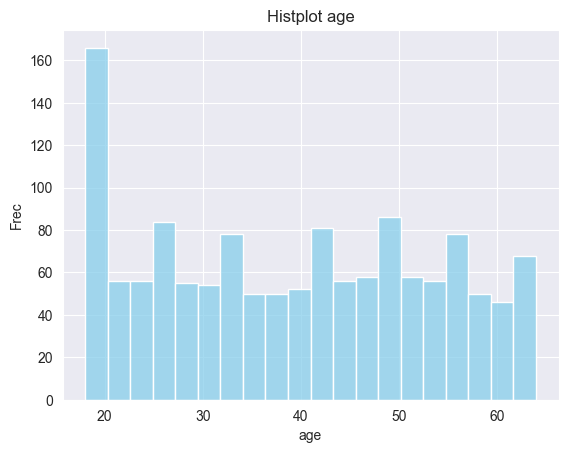

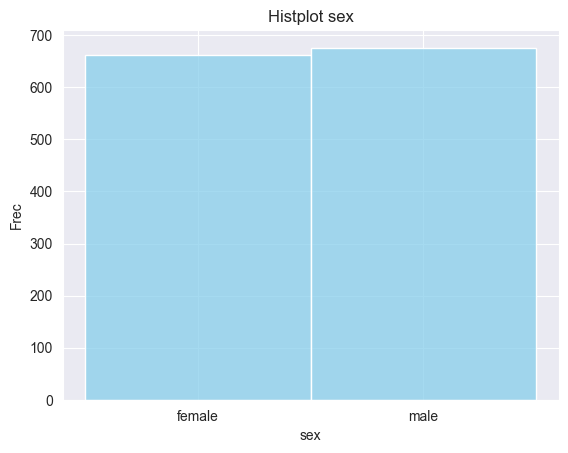

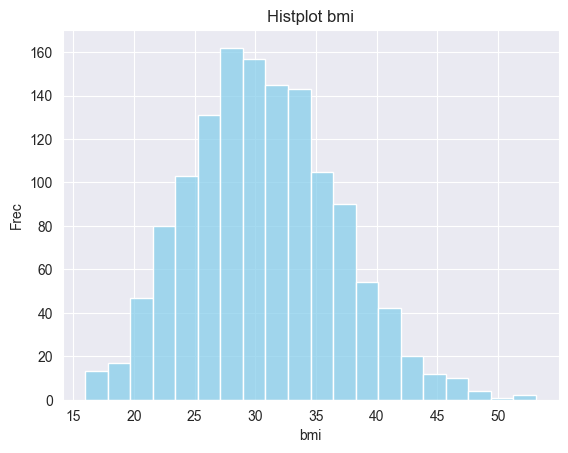

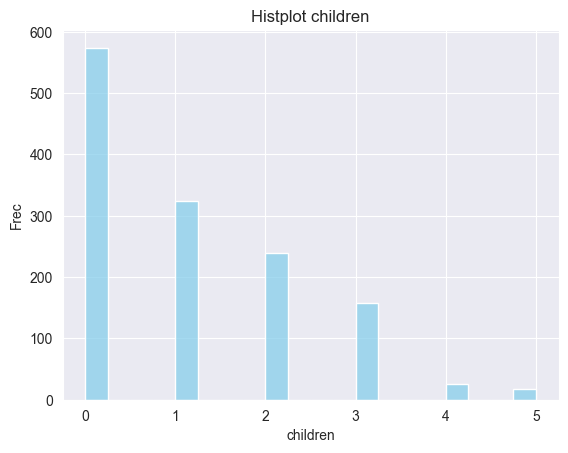

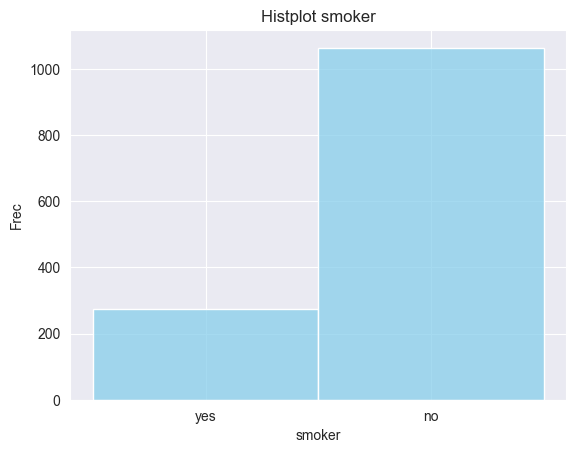

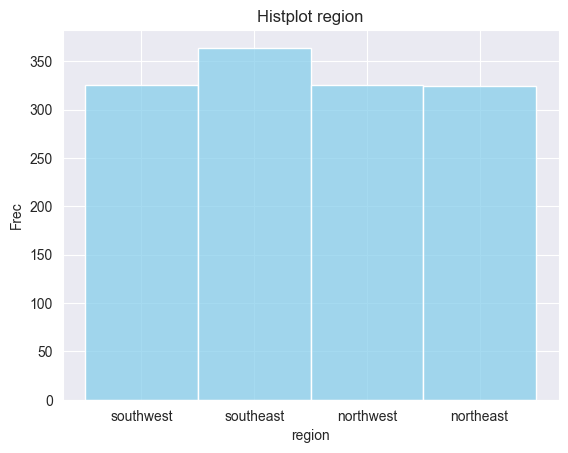

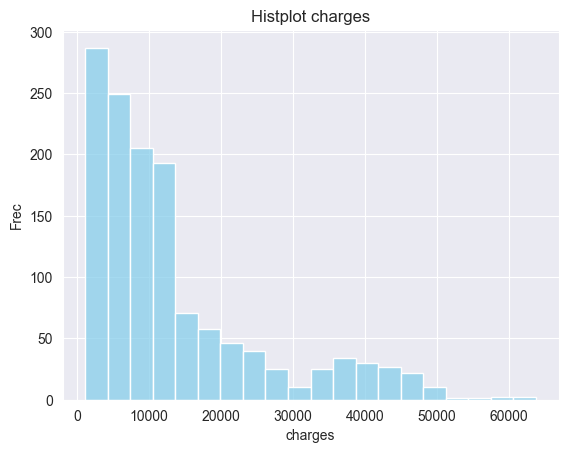

In [205]:
for column in dataframe.columns:
    sns.histplot(dataframe[column], bins=20, kde=False, color='skyblue')

    plt.xlabel(column)
    plt.ylabel('Frec')
    plt.title(f'Histplot {column}')

    plt.show()

### Scattter 

In [206]:
fig = px.scatter(dataframe, x="age", y="charges", title="Health plan price", trendline='ols')
fig.show()

In [207]:
fig = px.scatter(dataframe, x="bmi", y="charges", title="Health plan price", trendline='ols')
fig.show()

In [208]:
fig = px.scatter(dataframe, x="age", y="charges", color="smoker", facet_col="sex", title="Health plan price",
                 trendline='ols')
fig.show()

In [209]:
fig = px.scatter(dataframe, x="bmi", y="charges", color="smoker", facet_col="sex", title="Health plan price",
                 trendline='ols')
fig.show()

In [210]:
le = LabelEncoder()

In [211]:
dataframe['smoker'] = le.fit_transform(dataframe['smoker'])
dataframe['region'] = le.fit_transform(dataframe['region'])
dataframe['sex'] = le.fit_transform(dataframe['sex'])

In [212]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

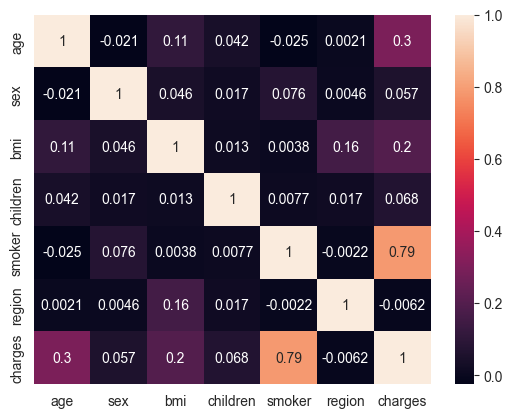

In [213]:
sns.heatmap(dataframe.corr(), annot=True)

#### Idea, split the dataframe by gender

In [214]:
dataframe_men = dataframe[dataframe['sex'] == 0]
dataframe_woman = dataframe[dataframe['sex'] == 1]

<Axes: >

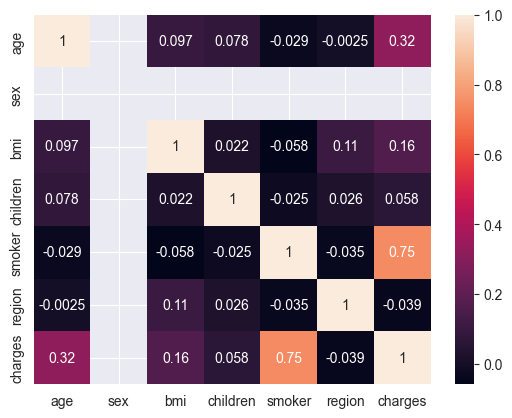

In [215]:
sns.heatmap(dataframe_men.corr(), annot=True)

<Axes: >

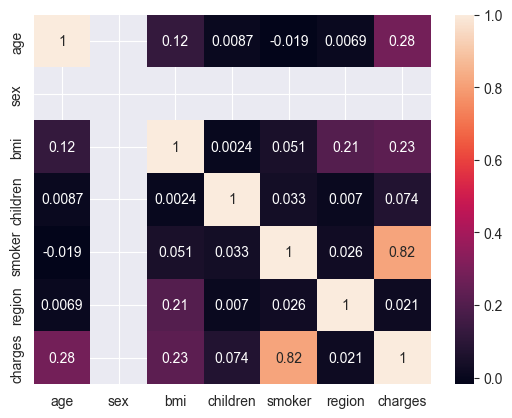

In [216]:
sns.heatmap(dataframe_woman.corr(), annot=True)

### Using OLS 
Using 3 best correlation variables 

In [217]:
X = dataframe.drop(['charges', 'children', 'region', 'sex'], axis=1)
y = dataframe['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [218]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [219]:
y_pred

array([ 1.15594725e+04,  9.99083066e+03,  3.72885551e+04,  1.65344780e+04,
        7.38948020e+03,  4.03410659e+03,  1.45872690e+03,  1.32893966e+04,
        7.91832013e+03,  6.37126068e+03,  3.26986871e+03,  9.75814636e+03,
        9.12012776e+03,  4.71823156e+03,  2.79396714e+04,  1.03824080e+04,
        1.17498776e+04,  5.52824263e+03,  7.61262498e+03,  2.68205852e+04,
        3.29949520e+04,  1.37655805e+04,  1.17766769e+04,  3.29303190e+04,
        4.89887801e+03,  8.64916084e+03,  1.15774450e+03,  9.33672284e+03,
        4.65775890e+03,  9.83221377e+03,  7.94983220e+03,  4.03370148e+04,
        1.64794415e+04,  1.46250780e+04,  2.45908956e+04,  5.10215452e+03,
        1.25622210e+04,  3.07420801e+04,  3.26993576e+04,  4.22701504e+03,
        4.06561866e+03,  4.84506021e+03,  3.03908879e+04,  3.87300351e+04,
        2.82837615e+04,  4.28782089e+03,  1.02762192e+04,  7.70621863e+03,
        3.17627506e+03,  1.08595345e+04,  5.51154405e+03,  2.23872081e+03,
        3.32453345e+04,  

In [220]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1261     3277.16100
494     17942.10600
97      10226.28420
418     14418.28040
920     13451.12200
Name: charges, Length: 402, dtype: float64

In [221]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [222]:
print(f'MSE : {mse}\n'
      f'RMSE : {rmse}\n'
      f'MAE : {mae}\n'
      f'MAPE : {mape}')

MSE : 33920514.90536015
RMSE : 5824.132116063315
MAE : 4011.3194473641984
MAPE : 0.42488878053934226


Poor results <br>
Next idea, test dataframes by gender

In [223]:
X = dataframe_men.drop(['charges', 'children', 'region'], axis=1)
y = dataframe_men['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MSE : {mse}\n'
      f'RMSE : {rmse}\n'
      f'MAE : {mae}\n'
      f'MAPE : {mape}')

MSE : 43437658.023902126
RMSE : 6590.7251515976695
MAE : 4364.3660750609415
MAPE : 0.3901167834770434


In [224]:
X = dataframe_woman.drop(['charges', 'children', 'region'], axis=1)
y = dataframe_woman['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MSE : {mse}\n'
      f'RMSE : {rmse}\n'
      f'MAE : {mae}\n'
      f'MAPE : {mape}')

MSE : 34182212.40028861
RMSE : 5846.5556014023
MAE : 4020.641994840789
MAPE : 0.4328822126690593


The prediction being made by sex, there were no improvements in the results. <br>
The next idea will be to classify BMI by category.

In [225]:
dataframe.loc[dataframe['bmi'] < 18.5, 'bmi'] = 'Underweight'
dataframe.loc[(dataframe['bmi'] >= 18.5) & (dataframe['bmi'] <= 24.9), 'bmi'] = 'Normal'
dataframe.loc[(dataframe['bmi'] > 24.9) & (dataframe['bmi'] <= 29.9), 'bmi'] = 'Overweight'
dataframe.loc[(dataframe['bmi'] > 29.9), 'bmi'] = 'Obese'
dataframe

C:\Users\golf\AppData\Local\Temp\ipykernel_14740\204942397.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Underweight' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



TypeError: '>=' not supported between instances of 'str' and 'float'

In [226]:
enc = OneHotEncoder
encoded_data = enc.fit_transform(dataframe[['bmi']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=enc.get_feature_names_out(['bmi']))
dataframe = pd.concat([dataframe, encoded_df], axis=1)

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [ ]:
sns.heatmap(dataframe.corr(), annot=True)